In [1]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from matplotlib import pyplot as plt

from nltk.corpus import brown
from nltk.corpus import treebank
from nltk.corpus import conll2000

import seaborn as sns

from gensim.models import KeyedVectors

from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN
from keras.models import Model
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import pandas as pd


Using TensorFlow backend.


In [2]:
dataset = pd.read_csv(r"C:\Users\Preeti\Neural Network\RNN\QuestionsClassification\\10k_logical_quant.csv")

In [3]:
dataset.head()

,Unnamed: 0,url,bucketId,QuestionId,,QuestionData,SolutionData,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 511,Unnamed: 512,Unnamed: 513,Unnamed: 514,Unnamed: 515,Unnamed: 516,Unnamed: 517,Unnamed: 518,Unnamed: 519,Unnamed: 520
0,0,/quantitativeaptitude/algebra_bucket/algebaric...,1930,12444,0,"{""title"":""Findvalue of 43 + 4 + 3 – 2 – 8 – 16...","question:""<span>Find the value of 43 +&nbsp;<i...","answers:[{""text"":""<span>24.638</span>""}","{""text"":""<span>25.638</span>""}","{""text"":""<span>26.638</span>""}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,/quantitativeaptitude/algebra_bucket/algebaric...,1930,109000,0,"{""title"":""If x + y = 7","then what will be the valu...""","question:""If x + y = 7",then what will be the value of x<sup>3</sup> ...,"answers:[{""text"":""21""}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,/quantitativeaptitude/algebra_bucket/algebaric...,1930,143204,0,"'{""title"":""If (x+ y – z)2 + (y + z- x)2 + (z+ ...","question:""<span>If (x\n+ y – z)<sup>2</sup> + ...","then\nthe value of x + y – z is:</span>""","answers:[{""text"":""√3""}","{""text"":""3√3""}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,/quantitativeaptitude/algebra_bucket/algebaric...,1930,110308,0,"'{""title"":""The value of expression:(x2−y2)3+(y...","question:""The value of expression:<div><inline...","answers:[{""text"":""<p>(x<sup>2</sup>-y<sup>2</s...","{""text"":""<span style=\""font-family: Verdana",Arial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,/quantitativeaptitude/algebra_bucket/algebaric...,1930,142958,0,"'{""title"":""If 4x= 18 y","then the value of (xy\\cfrac...""","question:""If 4x= 18 y",then the value of (<inlineformula>\\cfrac{x}{...,"answers:[{""text"":""<inlineformula>\\cfrac{1}{3}...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset['CompleteQuestion_data'] = dataset['QuestionData'] +' '+ dataset['SolutionData'] + " " + dataset['Unnamed: 7'] + "  " + dataset['Unnamed: 8'] + "  " + dataset['Unnamed: 9'] + "  " + dataset['Unnamed: 10'] 
print(dataset["CompleteQuestion_data"])

0        {"title":"Findvalue of 43 + 4 + 3 – 2 – 8 – 16...
1        {"title":"If x + y = 7  then what will be the ...
2        '{"title":"If (x+ y – z)2 + (y + z- x)2 + (z+ ...
3        '{"title":"The value of expression:(x2−y2)3+(y...
4        '{"title":"If 4x= 18 y  then the value of (xy\...
5        '{"title":"The solution for 2xx+3−4x−3=−6x+3\\...
6        '{"title":"The L.C.M of the polynomials X and ...
7        '{"title":"9 (x+y)2 - 4x2 can be factorised as...
8        '{"title":"Find the value of 0.8×0.8×0.8×0.8×0...
9        '{"title":"If x100 + 2x99 + K   is divisible b...
10       '{"title":"An examiner awards the highest mark...
11       '{"title":"If\nx- y = 2  xy = 24  then the val...
12       '{"title":"Simplified value of (1.25)3 - 2.25 ...
13       '{"title":"If1x+y\\cfrac{1}{x+y} = 1x\\cfrac{1...
14       '{"title":"If (x+2) and (x-1) are the factors ...
15       '{"title":"If\nx + 1x\\cfrac{1}{x} = 2  x ≠ 0 ...
16       '{"title":"If\n9x – 92x\\cfrac{9}{2x}= 18  the.

In [5]:
# Drop coulmns which are combined in "Question_data"
dataset = dataset.drop(['QuestionData', 'SolutionData', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis = 1) 

In [6]:
# Checking is question is there inthe completeQuestion_data
dataset['check'] = map(lambda x: x.find('question'), dataset['CompleteQuestion_data'])
#dataset.head()

In [7]:
dataset = dataset.drop(['check'] , axis = 1)

In [8]:
dataset_new = dataset[['url','bucketId','QuestionId', 'CompleteQuestion_data']]
dataset_new.head()

,url,bucketId,QuestionId,CompleteQuestion_data
0,/quantitativeaptitude/algebra_bucket/algebaric...,1930,12444,"{""title"":""Findvalue of 43 + 4 + 3 – 2 – 8 – 16..."
1,/quantitativeaptitude/algebra_bucket/algebaric...,1930,109000,"{""title"":""If x + y = 7 then what will be the ..."
2,/quantitativeaptitude/algebra_bucket/algebaric...,1930,143204,"'{""title"":""If (x+ y – z)2 + (y + z- x)2 + (z+ ..."
3,/quantitativeaptitude/algebra_bucket/algebaric...,1930,110308,"'{""title"":""The value of expression:(x2−y2)3+(y..."
4,/quantitativeaptitude/algebra_bucket/algebaric...,1930,142958,"'{""title"":""If 4x= 18 y then the value of (xy\..."


In [9]:
from bs4 import BeautifulSoup
# Before running any regular expression, try running this
dataset_new['CompleteQuestion_data'] = dataset_new['CompleteQuestion_data'].astype('str')

In [10]:
dataset_new['CompleteQuestion_data'] = [BeautifulSoup(text).get_text() for text in dataset_new['CompleteQuestion_data'] ]

In [11]:
dataset_new['check'] = map(lambda x: x.find('answers'), dataset['CompleteQuestion_data'])

In [12]:
dataset_new = dataset_new.drop('check', axis = 1)

In [13]:
dataset_new['Question_data'] = dataset_new['CompleteQuestion_data'].replace(regex=True,to_replace=r'answers*',value=r'')

In [14]:
#dataset_new['Question_data_2'] = 
dataset_new['Question_data'].replace(regex=True, to_replace=r'.*question:',inplace=True,value=r'')
#dataset_new['Question_data'] = dataset_new['Question_data'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))
print(dataset_new['Question_data'].head())

0    "Find the value of 43 + \\cfrac{4}{9}+\\cfrac{...
1    "If x + y = 7   then what will be the value of...
2    "If (x\n+ y – z)2 + (y + z- x)2 + (z+ x- y)2 =...
3    "The value of expression:\\cfrac{(x^2-y^2)^3+ ...
4    "If 4x= 18 y   then the value of (\\cfrac{x}{y...
Name: Question_data, dtype: object


In [15]:
# This may not be needed
dataset_new.Question_data = dataset_new.Question_data.str.replace('<[^<]+?>', '') 

In [16]:
#replacements << ['â€¦', '…']           # elipsis
#replacements << ['â€“', '–']           # long hyphen
#replacements << ['â€™', '’']           # curly apostrophe
#replacements << ['â€œ', '“']           # curly open quote
#replacements << [/â€[[:cntrl:]]/, '”'] # curly close quote

#â€œ = left quote = “
#â€ = right quote = ”

#â€˜ = left single quote = ‘
#â€™ = right single quote = ’

#â€” = en dash = –
#â€“ = em dash = —

#â€¢ = hyphen = -
#â€¦ = ellipsis = …

dataset_new.Question_data = dataset_new.Question_data.str.replace('â€œ', '“')
dataset_new.Question_data = dataset_new.Question_data.str.replace('â€', '”')

dataset_new.Question_data = dataset_new.Question_data.str.replace('â€˜', '“')
dataset_new.Question_data = dataset_new.Question_data.str.replace('â€™', '”')

dataset_new.Question_data = dataset_new.Question_data.str.replace('â€”', '“')
dataset_new.Question_data = dataset_new.Question_data.str.replace('â€“', '”')

dataset_new.Question_data = dataset_new.Question_data.str.replace('â€¢', '“')
dataset_new.Question_data = dataset_new.Question_data.str.replace('â€¦', '”')

In [17]:
dataset_new.Question_data = dataset_new.Question_data.str.replace('"', '') 

In [18]:
#dataset_new = dataset_new.drop(["CompleteQuestion_data", "Question_data_2"], axis = 1)
dataset_new = dataset_new.drop(["CompleteQuestion_data"], axis = 1)
dataset_new.head()

,url,bucketId,QuestionId,Question_data
0,/quantitativeaptitude/algebra_bucket/algebaric...,1930,12444,Find the value of 43 + \\cfrac{4}{9}+\\cfrac{3...
1,/quantitativeaptitude/algebra_bucket/algebaric...,1930,109000,If x + y = 7 then what will be the value of ...
2,/quantitativeaptitude/algebra_bucket/algebaric...,1930,143204,If (x\n+ y – z)2 + (y + z- x)2 + (z+ x- y)2 = ...
3,/quantitativeaptitude/algebra_bucket/algebaric...,1930,110308,The value of expression:\\cfrac{(x^2-y^2)^3+ (...
4,/quantitativeaptitude/algebra_bucket/algebaric...,1930,142958,If 4x= 18 y then the value of (\\cfrac{x}{y}...


In [19]:
#&nbsp;\\cfrac{4.80\\times392\\times2.25}{0.16\\times1.5\\times0.013}&nbsp; &nbsp; &nbsp;
from bs4 import BeautifulSoup
# Before running any regular expression, try running this
dataset_new['Question_data'] = [BeautifulSoup(text).get_text() for text in dataset_new['Question_data'] ]

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'

In [20]:
dataset_new['Question_data'] = dataset_new['Question_data'].astype('str')
dataset_new['Question_data'].describe()

count     11658
unique    10707
top         nan
freq        430
Name: Question_data, dtype: object

In [21]:
# Before running any regular expression, try running this
dataset_new['Question_data'] = [BeautifulSoup(text).get_text() for text in dataset_new['Question_data'] ]

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'

In [22]:
#The + ve square root of (x2 + 2x - 1) + \\cfrac{1}{(x^2+2x+1)}Â is:Â Â  :[{text:(x + 1) +Â \\cfrac{1}{(x + 1)}}  {text:(x + 1) -Â \\cfrac{1}{(x + 1)}}  {text:(x + 2) -
dataset_new['Question_data'].replace(regex=True, to_replace=r'\\cfrac{',inplace=True,value=r'')
#dataset_new['Question_data'].replace(regex=True, to_replace=r':[',inplace=True,value=r'')
dataset_new['Question_data'].replace(regex=True, to_replace=r'{text:',inplace=True,value=r'')
dataset_new['Question_data'].replace(regex=True, to_replace=r':\[',inplace=True,value=r'')
dataset_new['Question_data'].replace(regex=True, to_replace=r'\n',inplace=True,value=r'')
dataset_new['Question_data'].replace(regex=True, to_replace=r'}{',inplace=True,value=r'')
dataset_new['Question_data'].replace(regex=True, to_replace=r'}',inplace=True,value=r'')
dataset_new['Question_data'].replace(regex=True, to_replace=r'{',inplace=True,value=r'')
dataset_new['Question_data'].replace(regex=True, to_replace=r'\\',inplace=True,value=r'')
# If x â€“ 1x = 6   find the value of x3 â€“ 1x^3:  198Â   234
dataset_new['Question_data'].replace(regex=True, to_replace=r'â€“',inplace=True,value=r'')
dataset_new['Question_data'].replace(regex=True, to_replace=r'Â',inplace=True,value=r'')

#\\times

In [23]:
dataset_new['Question_data'] = dataset_new['Question_data'].astype('str')


In [24]:
# Convert all string columns into lowercase 
dataset_new = dataset_new.applymap(lambda s:s.lower() if type(s) == str else s)

In [25]:
dataset_new['Question_data'].replace(regex=True, to_replace=r'ifn',inplace=True,value=r'if ')

In [26]:
# nwhat
# thensquare
# findnthe
# termsnthe
# threennumbers
# nfind
# fournnumbers
# thenminimum
# thenfirst
# quantitativeaptitude
# thenminimum
# tontwice
# thengeometric

dataset_new['Question_data'].replace(regex=True, to_replace=r'then[a-z]+',inplace=True,value=r'the ')
dataset_new['Question_data'].replace(regex=True, to_replace=r'nwhat',inplace=True,value=r' what')
dataset_new['Question_data'].replace(regex=True, to_replace=r'thensquare',inplace=True,value=r'the square ')
dataset_new['Question_data'].replace(regex=True, to_replace=r'findnthe',inplace=True,value=r'find the')
dataset_new['Question_data'].replace(regex=True, to_replace=r'termsnthe',inplace=True,value=r'terms the')

dataset_new['Question_data'].replace(regex=True, to_replace=r'threennumbers',inplace=True,value=r'three numbers')
dataset_new['Question_data'].replace(regex=True, to_replace=r'nfind',inplace=True,value=r' find')
dataset_new['Question_data'].replace(regex=True, to_replace=r'fournnumbers',inplace=True,value=r'four numbers')
dataset_new['Question_data'].replace(regex=True, to_replace=r'thenminimum',inplace=True,value=r'the minimum')
dataset_new['Question_data'].replace(regex=True, to_replace=r'thenfirst',inplace=True,value=r'the first')

dataset_new['Question_data'].replace(regex=True, to_replace=r'quantitativeaptitude',inplace=True,value=r'quantitative aptitude')
dataset_new['Question_data'].replace(regex=True, to_replace=r'thenminimum',inplace=True,value=r'the minimum')
dataset_new['Question_data'].replace(regex=True, to_replace=r'tontwice',inplace=True,value=r'to twice')
dataset_new['Question_data'].replace(regex=True, to_replace=r'thengeometric',inplace=True,value=r'the geometric')
dataset_new['Question_data'].replace(regex=True, to_replace=r'nnone',inplace=True,value=r'none')
dataset_new['Question_data'].replace(regex=True, to_replace=r'innplace',inplace=True,value=r'in place')
dataset_new['Question_data'].replace(regex=True, to_replace=r'nonenof',inplace=True,value=r'none of')
dataset_new['Question_data'].replace(regex=True, to_replace=r'antime',inplace=True,value=r'a time')
dataset_new['Question_data'].replace(regex=True, to_replace=r'isnequal',inplace=True,value=r'is equal')
dataset_new['Question_data'].replace(regex=True, to_replace=r'valueof',inplace=True,value=r'value of')
# father’snmonthly

dataset_new['Question_data'].replace(regex=True, to_replace=r'father’snmonthly',inplace=True,value=r'father’s monthly')

dataset_new['Question_data'].replace(regex=True, to_replace=r'monthlynsalary',inplace=True,value=r'monthly salary')
dataset_new['Question_data'].replace(regex=True, to_replace=r'ofleft',inplace=True,value=r'of left')
dataset_new['Question_data'].replace(regex=True, to_replace=r'simplifiednfrom',inplace=True,value=r'simplified from')
dataset_new['Question_data'].replace(regex=True, to_replace=r'ofnthe',inplace=True,value=r'of the')
# father’snmonthly
# allnreal
dataset_new['Question_data'].replace(regex=True, to_replace=r'allnreal',inplace=True,value=r'all real')
dataset_new['Question_data'].replace(regex=True, to_replace=r'whichnof',inplace=True,value=r'which of')
dataset_new['Question_data'].replace(regex=True, to_replace=r'quantityna',inplace=True,value=r'quantity')
dataset_new['Question_data'].replace(regex=True, to_replace=r'isngreater',inplace=True,value=r'is greater')

dataset_new['Question_data'].replace(regex=True, to_replace=r'bendetermined',inplace=True,value=r'be determined')
dataset_new['Question_data'].replace(regex=True, to_replace=r'thatnsatisfy',inplace=True,value=r'that satisfy')
dataset_new['Question_data'].replace(regex=True, to_replace=r'bentwo',inplace=True,value=r'be two')
dataset_new['Question_data'].replace(regex=True, to_replace=r'ofnf',inplace=True,value=r'of f')

# xnsatisfying
dataset_new['Question_data'].replace(regex=True, to_replace=r'xnsatisfying',inplace=True,value=r'x satisfying')
dataset_new['Question_data'].replace(regex=True, to_replace=r'thatnsatisfy',inplace=True,value=r'that satisfy')
dataset_new['Question_data'].replace(regex=True, to_replace=r'bentwo',inplace=True,value=r'be two')
dataset_new['Question_data'].replace(regex=True, to_replace=r'ofnf',inplace=True,value=r'of f')



In [27]:
#dataset_new['Question_data'].replace(regex=True, to_replace=r' the the',inplace=True,value=r' the')
dataset_new['Question_data'].replace(regex=True, to_replace=r'\s+the\s+the\s+',inplace=True,value=r' the ')
dataset_new['Question_data'].replace(regex=True, to_replace=r'\s+of\s+of\s+',inplace=True,value=r' of ')
#dataset_new['Question_data'].replace(regex=True, to_replace=r'\w+.\w+',inplace=True,value=r'\w+ . \w+')

In [28]:
dataset_new.isnull().sum()

url              302
bucketId         305
QuestionId       398
Question_data      0
dtype: int64

In [29]:
# Removing rows with null values
dataset_new2 = dataset_new[dataset_new.isnull().sum(axis=1) < 1]
#print(len(dataset_new[dataset_new.isnull().sum(axis=1) < 1].index))
#print(100*(len(dataset_new[dataset_new.isnull().sum(axis=1) > 3].index) / len(dataset_new.index)))
dataset_new2.isnull().sum()
#dataset_new2.head(10)

url              0
bucketId         0
QuestionId       0
Question_data    0
dtype: int64

In [30]:
# /quantitativeaptitude/algebra_bucket/algebaric.
#print(dataset_new2['url'].str.split('/', expand=True))
#dataset_new2[['empty', 'Category', 'subcategory', 'question_type', 'level', 'nothing1', 'nothing2']] = dataset_new2['url'].str.split('/', expand=True)

#pat = '(?P<want1>.*) - (?P<want2>.*) - (?P<want3>.*)'
#df.join(df.variable.str.extract(pat, expand=True))
#dataset_new2.drop(['want1', 'want2', 'want3', 'want4'], axis = 1)
#pat = '(?P<want1>.*) - (?P<want2>.*) - (?P<want3>.*)'
#/quantitativeaptitude/algebra_bucket/functions/level_01/
#pat = '\/(?P<want1>)\/(?P<want2>)\/(?P<want3>)\/(?P<want4>)\/'
#dataset_new2.join(dataset_new2.url.str.extract(pat, expand=True))

#dataset_new2[['nothing1', 'want1', 'want2', 'want3', 'want4', 'nothing2']] = 
new = dataset_new2['url'].str.split('/', expand=True)
new.head()
#dataset_new2.head()
#s1 = '/quantitativeaptitude/algebra_bucket/functions/level_01/'
#A['a1', 'a2', 'a3', 'a4', 'a5', 'a6'] = Series('')
#chk = np.array(s1.split('/'))
#df = DataFrame('1': one)
#A['a1', 'a2', 'a3', 'a4', 'a5', 'a6'] = pd.DataFrame(s1.split('/'))
#chk


,0,1,2,3,4,5,6,7
0,,quantitativeaptitude,algebra_bucket,algebaric_simplification,level_01,,None,None
1,,quantitativeaptitude,algebra_bucket,algebaric_simplification,level_01,,None,None
2,,quantitativeaptitude,algebra_bucket,algebaric_simplification,level_01,,None,None
3,,quantitativeaptitude,algebra_bucket,algebaric_simplification,level_01,,None,None
4,,quantitativeaptitude,algebra_bucket,algebaric_simplification,level_01,,None,None


In [31]:
dataset_new2['Category'] = new[1]
dataset_new2['Subcategory'] = new[2]
dataset_new2['subtype'] = new[3]
dataset_new2['level'] = new[4]
#dataset_new2[['Category', 'Subcategory', 'subtype', 'level']] = new[1, 2.]

In [32]:
#dataset_new2 = dataset_new2.drop(['want1', 'want2', 'want3', 'want4'], axis = 1)
dataset_new2 = dataset_new2.drop('url', axis = 1)
dataset_new2.head()
#dataset = dataset.drop(['QuestionData', 'SolutionData', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis = 1) 

,bucketId,QuestionId,Question_data,Category,Subcategory,subtype,level
0,1930,12444,find the value of 43 + 49+34-23-89 - 16? 24.63...,quantitativeaptitude,algebra_bucket,algebaric_simplification,level_01
1,1930,109000,if x + y = 7 then what will be the value of ...,quantitativeaptitude,algebra_bucket,algebaric_simplification,level_01
2,1930,143204,if (xn+ y – z)2 + (y + z- x)2 + (z+ x- y)2 = 0...,quantitativeaptitude,algebra_bucket,algebaric_simplification,level_01
3,1930,110308,the value of expression:(x^2-y^2)^3+ (y^2-y^2)...,quantitativeaptitude,algebra_bucket,algebaric_simplification,level_01
4,1930,142958,if 4x= 18 y then the value of (xy - 1) is: ...,quantitativeaptitude,algebra_bucket,algebaric_simplification,level_01


In [76]:
df_category = dataset_new2.drop(['Subcategory', 'subtype', 'level', 'QuestionId', 'bucketId'], axis = 1)

In [77]:
df_category.head()

,Question_data,Category
0,find the value of 43 + 49+34-23-89 - 16? 24.63...,quantitativeaptitude
1,if x + y = 7 then what will be the value of ...,quantitativeaptitude
2,if (xn+ y – z)2 + (y + z- x)2 + (z+ x- y)2 = 0...,quantitativeaptitude
3,the value of expression:(x^2-y^2)^3+ (y^2-y^2)...,quantitativeaptitude
4,if 4x= 18 y then the value of (xy - 1) is: ...,quantitativeaptitude


In [93]:
df_category = df_category[df_category.isnull().sum(axis=1) < 1]
#print(len(dataset_new[dataset_new.isnull().sum(axis=1) < 1].index))
#print(100*(len(dataset_new[dataset_new.isnull().sum(axis=1) > 3].index) / len(dataset_new.index)))
df_category.isnull().sum()

#df_category.drop('Category_numbered', axis = 1)

#df_category['Category'] = df_category['Category'].astype('str')
#word_tokenizer = Tokenizer()                      # instantiate tokeniser
#word_tokenizer.fit_on_texts(df_category['Category'])                    # fit tokeniser on data
#df_category['Category_numbered'] = word_tokenizer.texts_to_sequences(df_category['Category'])  # use the tokeniser to encode input sequence

Question_data    0
Category         0
dtype: int64

In [94]:
df_category.head()

,Question_data,Category
0,find the value of 43 + 49+34-23-89 - 16? 24.63...,quantitativeaptitude
1,if x + y = 7 then what will be the value of ...,quantitativeaptitude
2,if (xn+ y – z)2 + (y + z- x)2 + (z+ x- y)2 = 0...,quantitativeaptitude
3,the value of expression:(x^2-y^2)^3+ (y^2-y^2)...,quantitativeaptitude
4,if 4x= 18 y then the value of (xy - 1) is: ...,quantitativeaptitude


In [95]:
#df_category.Category_numbered.unique
df_category.Category.dropna()
df_category.Category.unique()

array(['quantitativeaptitude', 'b><\\', 'logicalreasoning', 'b><',
       'b><br><',
       'p><p><span><span><span>\\n<img src=\\"data:image;base64',
       'span><'], dtype=object)

In [81]:
#df_category['Category_numbered'].value_counts()

In [96]:
df_category['Category'].value_counts()

quantitativeaptitude                                     5656
logicalreasoning                                         5592
b><                                                         5
span><                                                      2
p><p><span><span><span>\n<img src=\"data:image;base64       1
b><br><                                                     1
b><\                                                        1
Name: Category, dtype: int64

In [97]:
# df_filtered = df[df['Age'] >= 25]
# df.drop(df[df['Age'] < 25].index, inplace = True)
#df_category.drop(df_category[df_category['Category_numbered'] != 'quantitativeaptitude'], axis = 0))
#df_category_2 = df_category[df_category['Category'] == 'quantitativeaptitude']     #, axis = 0))
#df_category_2 = df_category[df_category['Category'] == 'logicalreasoning']     #, axis = 0))

# delete all rows with column 'Age' has value 30 to 40 
#indexNames = dfObj[ (dfObj['Age'] >= 30) & (dfObj['Age'] <= 40) ].index
#dfObj.drop(indexNames , inplace=True)

# delete all rows with column 'Age' has value 30 to 40 
#indexNames = df_category[ (df_category['Category'] != 'quantitativeaptitude') | (df_category['Category'] != 'logicalreasoning') ].index
#indexNames
#df_category.drop(indexNames , inplace=True)
# df = df[~df['your column'].isin(['list of strings'])]
l = ['quantitativeaptitude', 'logicalreasoning']
#searchfor = ['john', 'doe']
#df = df[~df.col.str.contains('|'.join(searchfor))]
#df_category = df_category[df_category['Category'].isin[l])] #.str.contains("XYZ")]
df_category = df_category[df_category.Category.str.contains('|'.join(l))]

In [98]:
df_category['Category'].value_counts()

quantitativeaptitude    5656
logicalreasoning        5592
Name: Category, dtype: int64

In [107]:
# quantitativeaptitude  = 1
# logicalreasoning      = 0
# lambda s:s.lower() if type(s) == str else s
#df_category = df_category.drop('num_category', axis = 1)
mapping = {'quantitativeaptitude': 1, 'logicalreasoning': 0}
df_category = df_category.replace({'Category': mapping})
df_category['Category'].value_counts()
#df_category['num_category'] = lambda x: 1 if df_category.Category.str.contains('quantitativeaptitude') else 0

1    5656
0    5592
Name: Category, dtype: int64

In [108]:
df_category.head()

,Question_data,Category
0,find the value of 43 + 49+34-23-89 - 16? 24.63...,1
1,if x + y = 7 then what will be the value of ...,1
2,if (xn+ y – z)2 + (y + z- x)2 + (z+ x- y)2 = 0...,1
3,the value of expression:(x^2-y^2)^3+ (y^2-y^2)...,1
4,if 4x= 18 y then the value of (xy - 1) is: ...,1


In [109]:
X = df_category['Question_data']
Y = df_category['Category']

In [110]:
print('sample X: ', X[0], '\n')
print('sample Y: ', Y[0], '\n')

sample X:  find the value of 43 + 49+34-23-89 - 16? 24.638  25.638  26.638  27.638 

sample Y:  1 



In [112]:
print("Length of first input sequence  : {}".format(len(X[1])))
#print("Length of first output sequence : {}".format(len(Y[1])))

Length of first input sequence  : 69


### Many to one problem
### Vectorise X and Y

#### Encode X to integer values. For Y One Hot Encoding will be used.

We'll use the Tokenizer() function from Keras library to encode text sequence to integer sequence

In [113]:
# encode X

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(X)                    # fit tokeniser on data
X_encoded = word_tokenizer.texts_to_sequences(X)  # use the tokeniser to encode input sequence

In [114]:
# look at first encoded data point

print("** Raw data point **", "\n", "-"*100, "\n")
print('X: ', X[0], '\n')
print('Y: ', Y[0], '\n')
print()
print("** Encoded data point **", "\n", "-"*100, "\n")
print('X: ', X_encoded[0], '\n')


** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  find the value of 43 + 49+34-23-89 - 16? 24.638  25.638  26.638  27.638 

Y:  1 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [42, 1, 97, 2, 716, 9989, 572, 367, 9990, 146, 185, 3693, 105, 3693, 509, 3693, 312, 3693] 



In [115]:
# check length of longest sentence
lengths = [len(seq) for seq in X_encoded]
print("Length of longest sentence: {}".format(max(lengths)))


Length of longest sentence: 315


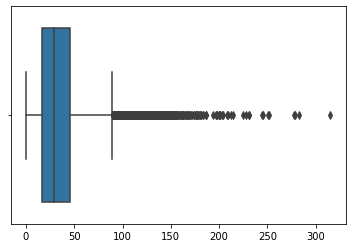

In [116]:
sns.boxplot(lengths)
plt.show()

In [117]:
# Pad each sequence to MAX_SEQ_LENGTH using KERAS' pad_sequences() function. 
# Sentences longer than MAX_SEQ_LENGTH are truncated.
# Sentences shorter than MAX_SEQ_LENGTH are padded with zeroes.

# Truncation and padding can either be 'pre' or 'post'. 
# For padding we are using 'pre' padding type, that is, add zeroes on the left side.
# For truncation, we are using 'post', that is, truncate a sentence from right side.

MAX_SEQ_LENGTH = 100  # sequences greater than 100 in length will be truncated

X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")

In [118]:
# print the first sequence
print(X_padded[0], "\n")

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   42    1
   97    2  716 9989  572  367 9990  146  185 3693  105 3693  509 3693
  312 3693] 



In [119]:
X = X_padded

In [120]:
# C:\Users\Preeti\Neural Network\RNN\QuestionsClassification

# word2vec download link (Size ~ 1.5GB): https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

path = 'C:\\Users\\Preeti\\Neural Network\\RNN\\QuestionsClassification\\GoogleNews-vectors-negative300.bin'

# load word2vec using the following function present in the gensim library
word2vec = KeyedVectors.load_word2vec_format(path, binary=True)

In [121]:
# word2vec effectiveness
word2vec.most_similar(positive = ["King", "Woman"], negative = ["Man"])

MemoryError: 

In [125]:
# assign word vectors from word2vec model

EMBEDDING_SIZE  = 300  # each word in word2vec model is represented using a 300 dimensional vector
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1

# create an empty embedding matix
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))

# create a word to index dictionary mapping
word2id = word_tokenizer.word_index

# copy vectors from word2vec model to the words present in corpus
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = word2vec[word]
    except KeyError:
        pass

In [126]:
Y.shape
#X.shape

(11248,)

In [127]:
# check embedding dimension
print("Embeddings shape: {}".format(embedding_weights.shape))

Embeddings shape: (26014, 300)


In [128]:
# let's look at an embedding of a word
embedding_weights[word_tokenizer.word_index['joy']]

array([ 0.4453125 , -0.20019531,  0.20019531, -0.03149414,  0.078125  ,
       -0.390625  ,  0.13671875, -0.13867188,  0.05395508,  0.10546875,
       -0.05029297, -0.23730469,  0.19921875,  0.12597656, -0.12695312,
        0.34179688,  0.06347656,  0.26757812, -0.07324219, -0.29101562,
        0.10498047,  0.11914062,  0.23730469,  0.00640869,  0.12451172,
       -0.00939941, -0.02770996,  0.03076172,  0.07421875, -0.22851562,
       -0.08056641, -0.05273438,  0.16894531,  0.19824219, -0.15625   ,
       -0.08740234,  0.10742188, -0.07177734,  0.05200195,  0.25976562,
        0.171875  , -0.13574219,  0.06738281,  0.00531006,  0.15527344,
       -0.03515625,  0.08789062,  0.3359375 , -0.12890625,  0.17578125,
       -0.08642578,  0.32421875, -0.09033203,  0.35351562,  0.24316406,
       -0.07470703, -0.06640625, -0.17578125,  0.06689453, -0.03833008,
        0.0100708 , -0.21484375, -0.03686523,  0.04394531,  0.02209473,
        0.00219727, -0.22460938,  0.03015137, -0.21582031,  0.16

In [129]:
# Example for one hot encoding

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
#Y = 
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example

#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


## Split data in training, validation and tesing sets

In [130]:
# split entire data into training and testing sets
TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=4)

In [131]:
# split training data into training and validation sets
VALID_SIZE = 0.15
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=VALID_SIZE, random_state=4)

In [132]:
# print number of samples in each set
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_validation.shape))
print('Shape of output sequences: {}'.format(Y_validation.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))

TRAINING DATA
Shape of input sequences: (8126, 100)
Shape of output sequences: (8126,)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (1434, 100)
Shape of output sequences: (1434,)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (1688, 100)
Shape of output sequences: (1688,)


In [133]:
# create architecture
from keras.layers import Flatten, GRU

rnn_model = Sequential()

# create embedding layer - usually the first layer in text problems
rnn_model.add(Embedding(input_dim     =  VOCABULARY_SIZE,         # vocabulary size - number of unique words in data
                        output_dim    =  EMBEDDING_SIZE,          # length of vector with which each word is represented
                        input_length  =  MAX_SEQ_LENGTH,          # length of input sequence
                        weights       = [embedding_weights],      # word embedding matrix
                        trainable     =  True                    # False - don't update the embeddings
))

#rnn_model.add(Embedding(input_dim     =  VOCABULARY_SIZE,         # vocabulary size - number of unique words in data
#                        output_dim    =  EMBEDDING_SIZE,          # length of vector with which each word is represented
#                        input_length  =  MAX_SEQ_LENGTH,          # length of input sequence
#                        weights       = [embedding_weights],      # word embedding matrix
#                        trainable     =  True                    # False - don't update the embeddings
#))
#rnn_model.add(Embedding(VOCABULARY_SIZE, output_dim=8))
# add an RNN layer which contains 64 RNN cells
#rnn_model.add(SimpleRNN(64, 
#              return_sequences=True  # True - return whole sequence; False - return single output of the end of the sequence
#))

# add time distributed (output at each sequence) layer
#rnn_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

#rnn_model.add(Dense(NUM_CLASSES, activation='softmax' ))
#Flatten Layers
#rnn_model.add(Flatten())

#rnn_model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(no_dense[1], activation='relu'))
#model.add(Dropout(0.5))
rnn_model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
#softmax layer
rnn_model.add(Dense(1, activation='sigmoid'))


#model = Sequential()
#model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
#model.add(SpatialDropout1D(0.2))
#model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
#model.add(Dense(13, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# embedding_weights


W0728 23:05:35.665223 17832 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 23:05:36.057174 17832 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 23:05:36.150922 17832 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0728 23:05:36.378344 17832 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0728 23:05:36.380310 17832 deprecation_wrapper.py:119] 

In [134]:
rnn_model.compile(loss      =  'binary_crossentropy', # loss      =  'sparse_categorical_crossentropy'
                  optimizer =  'adam',
                  metrics   =  ['acc'])

W0728 23:06:10.696504 17832 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 23:06:10.728418 17832 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [135]:
# check summary of the model
rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          7804200   
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                31968     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 7,836,201
Trainable params: 7,836,201
Non-trainable params: 0
_________________________________________________________________


In [136]:
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Train on 8126 samples, validate on 1434 samples
Epoch 1/10
8126/8126 [==============================] - 18s 2ms/step - loss: 0.4875 - acc: 0.7810 - val_loss: 0.2450 - val_acc: 0.9086
Epoch 2/10
8126/8126 [==============================] - 17s 2ms/step - loss: 0.2037 - acc: 0.9259 - val_loss: 0.1691 - val_acc: 0.9379
Epoch 3/10
8126/8126 [==============================] - 17s 2ms/step - loss: 0.1203 - acc: 0.9626 - val_loss: 0.1674 - val_acc: 0.9393
Epoch 4/10
8126/8126 [==============================] - 17s 2ms/step - loss: 0.0874 - acc: 0.9733 - val_loss: 0.1582 - val_acc: 0.9463
Epoch 5/10
8126/8126 [==============================] - 16s 2ms/step - loss: 0.0633 - acc: 0.9793 - val_loss: 0.1704 - val_acc: 0.9435
Epoch 6/10
8126/8126 [==============================] - 16s 2ms/step - loss: 0.0486 - acc: 0.9868 - val_loss: 0.1704 - val_acc: 0.9484
Epoch 7/10
8126/8126 [==============================] - 17s 2ms/step - loss: 0.0383 - acc: 0.9900 - val_loss: 0.1850 - val_acc: 0.9449
Epoch 8

In [137]:
# X_test
rnn_model.predict(x = X_test)

array([[0.0012832 ],
       [0.9797549 ],
       [0.00371408],
       ...,
       [0.00810081],
       [0.99982345],
       [0.9962699 ]], dtype=float32)

In [138]:
X_test

array([[    0,     0,     0, ...,  1692,    54,    24],
       [    0,     0,     0, ...,   486,   660,   372],
       [    0,     0,     0, ...,    88,   181,    53],
       ...,
       [   12,   827,     6, ...,    32,    16,     3],
       [    0,     0,     0, ...,    18,    24,    28],
       [    0,     0,     0, ...,    77,    21, 14261]])

In [139]:
dataset_new.url.value_counts()

/quantitativeaptitude/geometry_mensuration/mensuration/level_03/                                                                                                                                            50
/quantitativeaptitude/arithmetic/si_ci/level_01/                                                                                                                                                            50
/logicalreasoning/verbal_reasoning/sitting_arrangement/level_03/                                                                                                                                            50
/quantitativeaptitude/geometry_mensuration/geometry/level_02/                                                                                                                                               50
/logicalreasoning/analytical_reasoning/syllogism_master/level_02/                                                                                                           

In [140]:
dataset_new.describe()

,url,bucketId,QuestionId,Question_data
count,11356,11353,11260,11658
unique,457,504,11249,10696
top,/quantitativeaptitude/geometry_mensuration/men...,2019,11810,nan
freq,50,50,2,430
